In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline
sns.set(rc={'figure.figsize': (12, 8)})

In [120]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [121]:
train_data.shape

(42000, 785)

In [122]:
test_data.shape

(28000, 784)

In [123]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


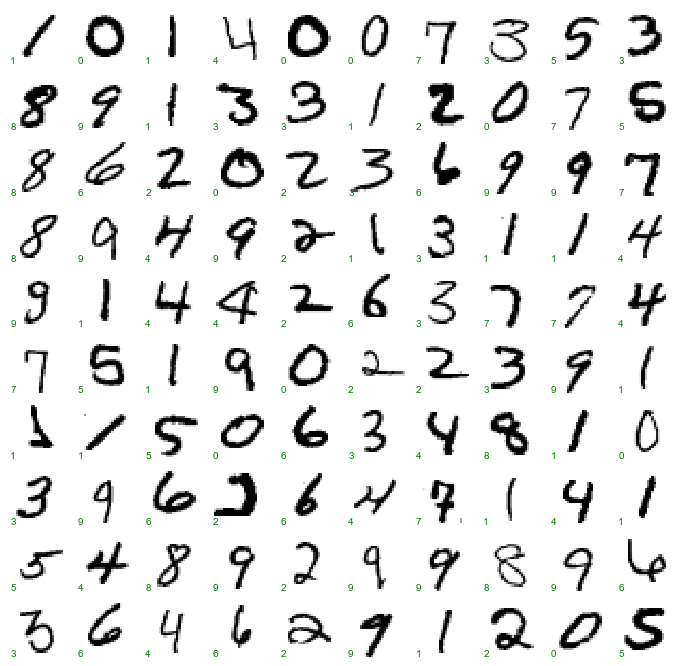

In [124]:
def vizualize_digits(digits, n_digits):
    X = digits.drop('label', axis=1)
    X = X.iloc[:n_digits, :].to_numpy()
    X = X.reshape(X.shape[0], 28, 28)
    labels = digits.label
    fig = plt.figure()
    for i in range (n_digits):
        fig.add_subplot(int(np.sqrt(n_digits)) + 1, int(np.sqrt(n_digits)) + 1, i + 1)
        plt.imshow(X[i])
        plt.axis('off')
        plt.title(str(labels[i]))
    fig.tight_layout()
    plt.show()

    
def vizualize_digits_100(digits):
    fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    images = digits.drop('label', axis=1).iloc[:100, :].to_numpy()
    images = images.reshape(images.shape[0], 28, 28)
    labels = digits.label
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='binary',
                 interpolation='nearest')
        ax.text(0.05, 0.05, str(labels[i]), fontsize=10,
               transform=ax.transAxes, color='green')
        
        
vizualize_digits_100(train_data)

In [ ]:
# normalize data
train_data /= 255
test_data /= 255

In [125]:
X = train_data.drop('label', axis=1)
y = train_data.label

In [126]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [127]:
pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier())
])

In [128]:
N_COMPONENTS = [20, 30]
NEIGHBORS = [3, 4]
WEIGHTS = ['distance']

In [129]:
param_grid = [{
    'pca__n_components': N_COMPONENTS,
    'clf__n_neighbors': NEIGHBORS,
    'clf__weights': WEIGHTS
}]

In [130]:
grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(Xtrain, ytrain)
y_model = grid.best_estimator_.predict(Xtest)

<ipython-input-131-857a90b51e84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_vizualize['label'] = y_model


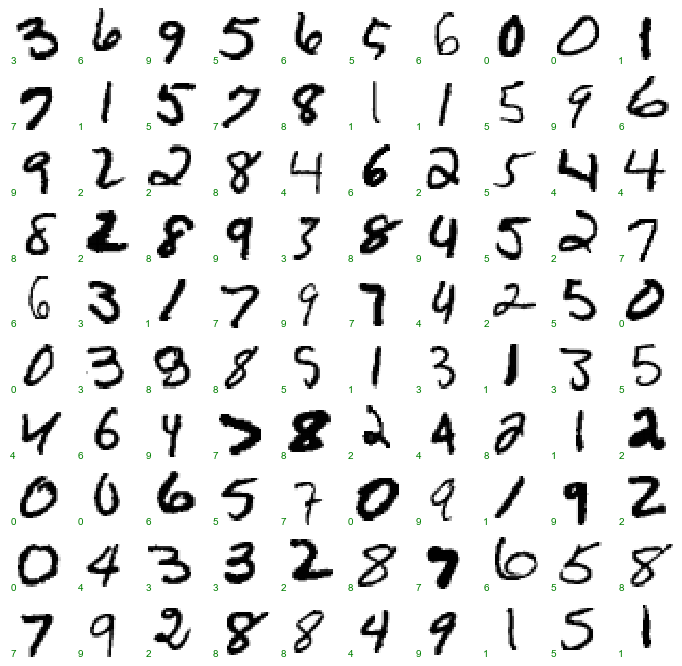

In [131]:
test_vizualize = Xtest
test_vizualize['label'] = y_model
vizualize_digits_100(test_vizualize.reset_index().drop('index', axis=1))

In [132]:
accuracy_score(ytest, y_model)

0.9743809523809523

In [133]:
labels = grid.best_estimator_.predict(test_data)

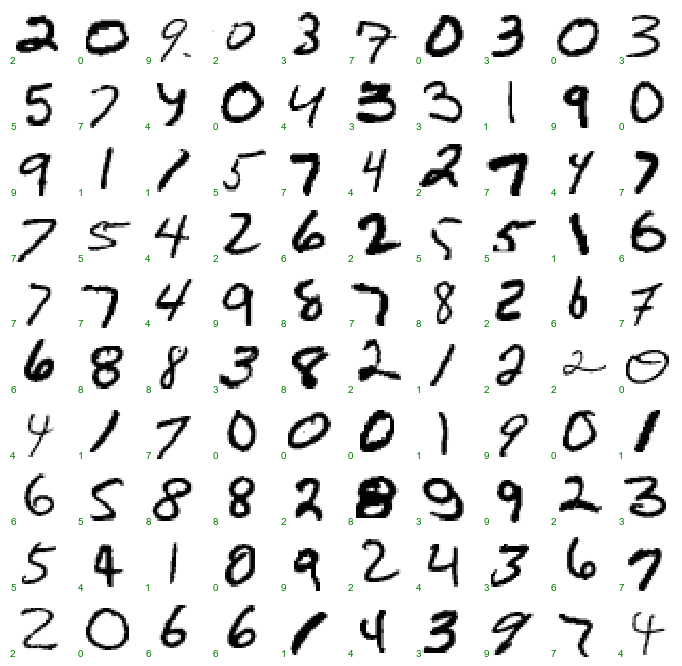

In [134]:
submisson_vizualize = test_data
submisson_vizualize['label'] = labels
vizualize_digits_100(submisson_vizualize.reset_index().drop('index', axis=1))

In [138]:
submission = pd.DataFrame({
    'ImageId': np.arange(1, labels.shape[0] + 1),
    'Label': labels
})

In [139]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
